In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
# load the data
df = pd.read_csv('mushrooms.csv')

In [2]:
df[df.isnull().any(axis=1)]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [3]:
from sklearn.model_selection import train_test_split
# split the data int x(training data) and y (results)
y = df['class']
x = df.drop(['class'], axis=1)
x = pd.get_dummies(x)
y = pd.get_dummies(y)
x.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 117 entries, cap-shape_b to habitat_w
dtypes: bool(117)
memory usage: 928.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   e       8124 non-null   bool 
 1   p       8124 non-null   bool 
dtypes: bool(2)
memory usage: 16.0 KB


In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# Define the hyperparameter grid
parameters = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 3, 4, 5],
    'max_depth': [9, 10, 11, 12],
    'class_weight': ['balanced', None],
}

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()
# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(dt_classifier, parameters, cv=5)  # cv is the number of cross-validation folds
# Fit the model to the training data
grid_search.fit(X_train, y_train)
# Get the best model with tuned hyperparameters
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
# Print the best model
print("Best model:", best_model)

# Optionally, you can get and print the cross-validated results
# cv_results = grid_search.cv_results_
# print("Cross-validated results:", cv_results)
# Optionally, you can evaluate the best model on the test set
test_score = best_model.score(X_test, y_test)
print("Test set accuracy:", test_score)


Best hyperparameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 2}
Best model: DecisionTreeClassifier(class_weight='balanced', max_depth=9)
Test set accuracy: 1.0


In [6]:
# Use the best model for scoring
score = best_model.score(X_test, y_test)
print("Test set accuracy:", score)

Test set accuracy: 1.0


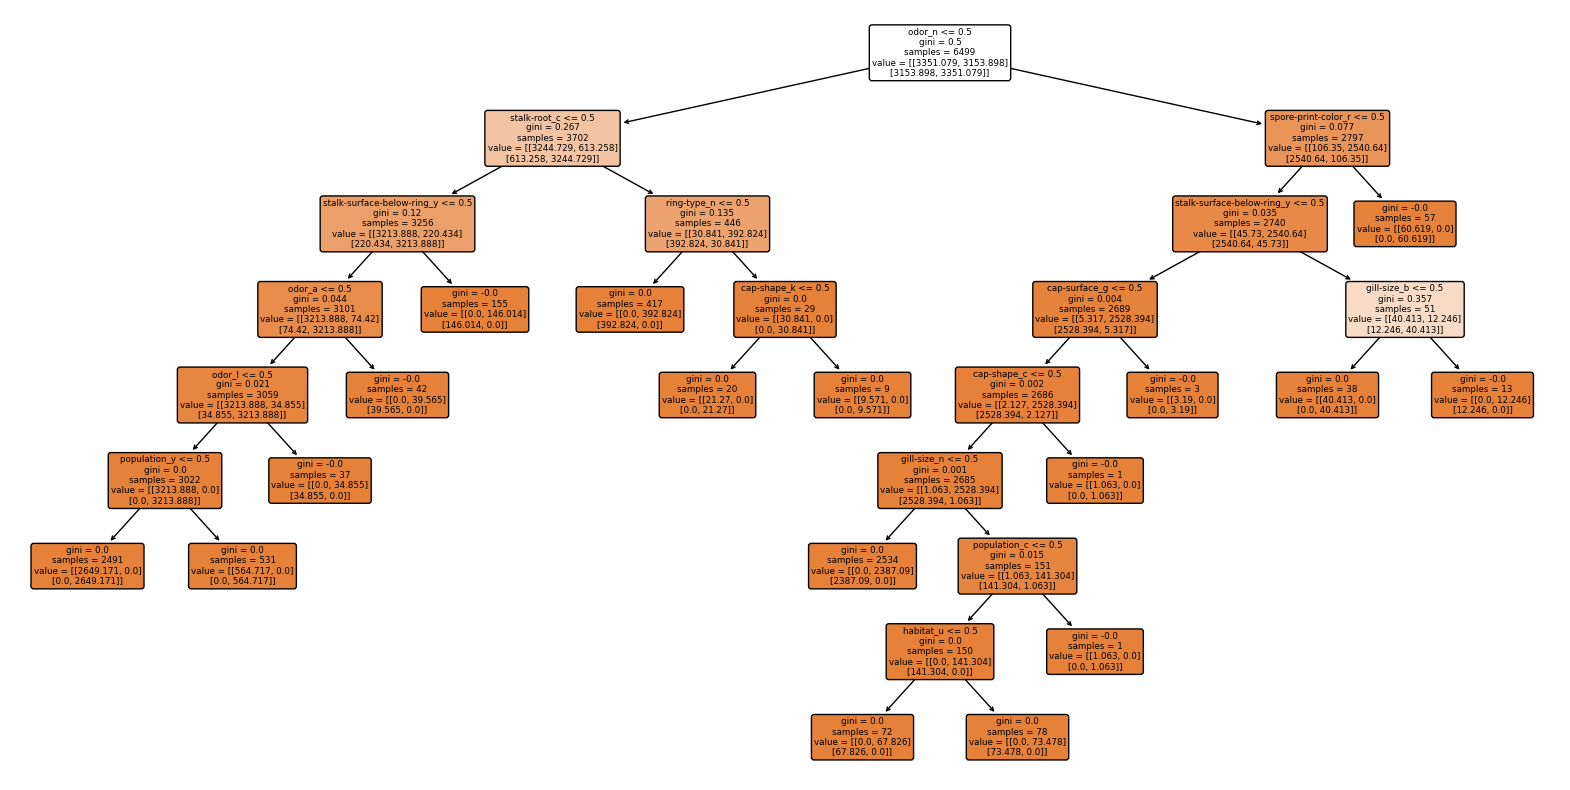

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X_test.columns, class_names=y_test.columns, rounded=True)
plt.show()